<a href="https://colab.research.google.com/github/keane13/Negative-Comments-Project/blob/main/Bad_Comment_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Negative Comments Classification Project


## Objective
In this Project we will Classify 6 Negative Comments  to identify which comments is Toxic, Severe Toxic, Threat, Obscene, insult or Identity Hate based on Tweets Comments Users.

### Instalation Package

In [4]:
!pip install nlp_utils

In [5]:
!pip install -q -U "tensorflow-text==2.8.*"

In [6]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 63.5 MB/s 
     |████████████████████████████████| 6.5 MB 45.8 MB/s 
     |████████████████████████████████| 895 kB 22.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Library

In [7]:
# Importing Neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Standar library
import re
import nltk
import string

# Third Party Library
import nlp_utils
#import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

# Tensorflow library
import tensorflow as tf
import tensorflow_text as text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

## Data Extraction

In [8]:
df=pd.read_csv('train_toxic.csv') 
# Reading train dataset.

In [9]:
df
# Loading dataset.

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [10]:
df.info()
# Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.shape

(159571, 8)

In [11]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Visualization

In [16]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [ ]:
sentencetype_graph=df.iloc[:,2:].sum()              
# Using only numeric columns.

In [ ]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

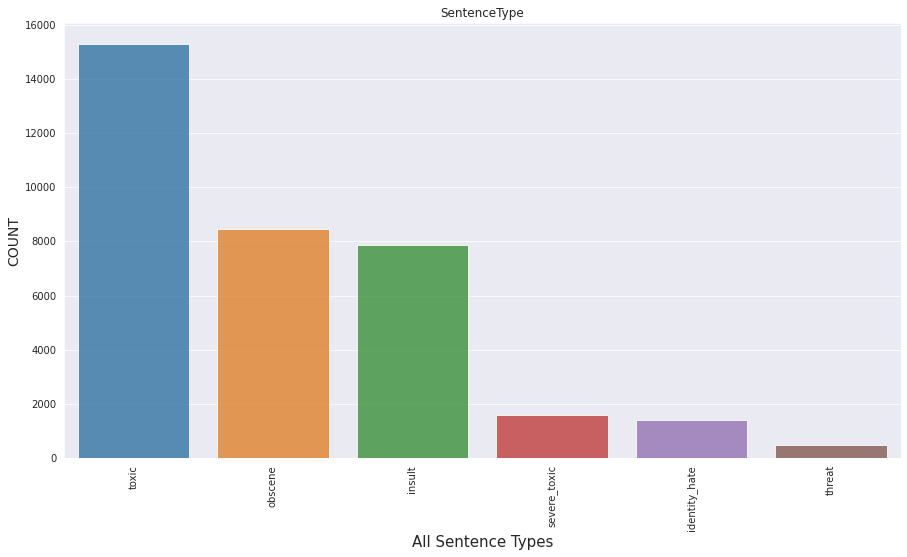

In [ ]:
sns.set_style("darkgrid")
ls=sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8) 
plt.title('SentenceType')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('All Sentence Types', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### There are a many toxic sentences followed by obscene sentences and very few threatening sentences as seen above. 

In [17]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# Visualising the subset datasets using wordcloud    

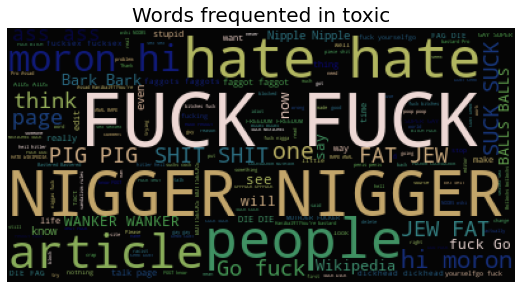

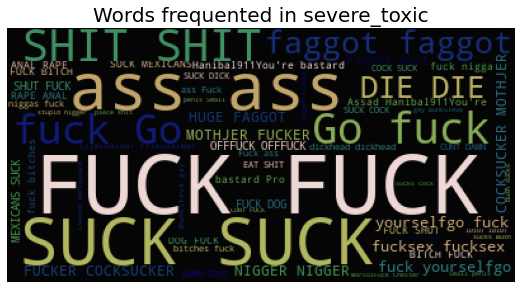

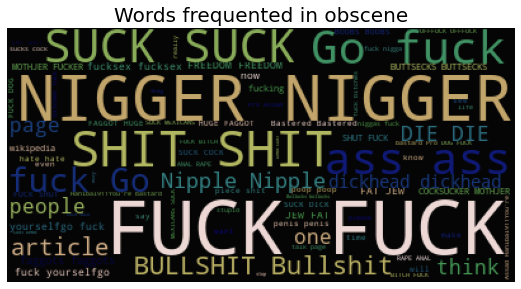

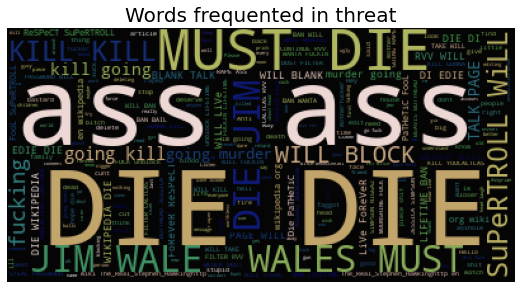

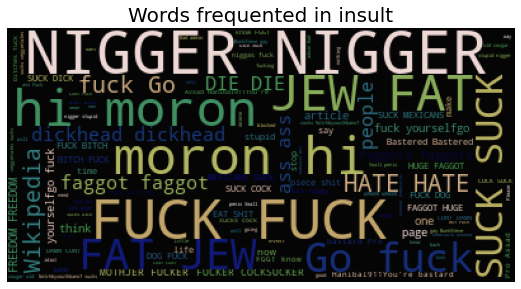

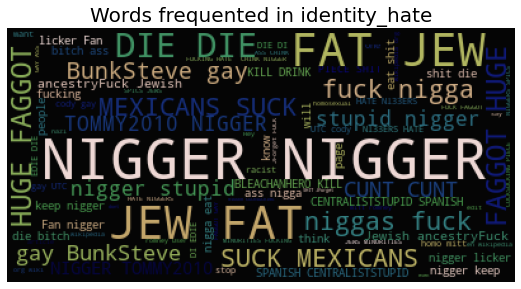

In [20]:
wordcloud(df,'toxic')
wordcloud(df,'severe_toxic')
wordcloud(df,'obscene')
wordcloud(df,'threat')
wordcloud(df,'insult')
wordcloud(df,'identity_hate')

From Negative Comments Above we could see majority words from each category.

# Text Pre-processing

Comment pasti datang dengan format dan penulisan yang berbeda-beda, maka dari itu kita perlu menyusun sistem untuk merapikan dan membersihkan teks dalam review-review tersebut.

In [12]:
tx=df['toxic'].value_counts()
st=df['severe_toxic'].value_counts() 
ob=df['obscene'].value_counts()
tr=df['threat'].value_counts()  
ins=df['insult'].value_counts() 
ih=df['identity_hate'].value_counts() 
print("Toxic :"  )
print(tx)
print("Sever Toxic :")
print(st)
print("Obscene :")
print(ob)
print("Threat :" )
print(tr)
print("Insult :")
print(ins)
print("Identity Hate :")
print(ih)
  
# Counts of toxic and non toxic sentences.

Toxic :
0    144277
1     15294
Name: toxic, dtype: int64
Sever Toxic :
0    157976
1      1595
Name: severe_toxic, dtype: int64
Obscene :
0    151122
1      8449
Name: obscene, dtype: int64
Threat :
0    159093
1       478
Name: threat, dtype: int64
Insult :
0    151694
1      7877
Name: insult, dtype: int64
Identity Hate :
0    158166
1      1405
Name: identity_hate, dtype: int64


In [13]:
df.isnull().sum()   

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [14]:
df["comment_text"].str.findall("\w+!").explode().value_counts()

Wikipedia!    2405
you!          1115
Thanks!        913
yourself!      870
welcome!       862
              ... 
rationale!       1
offs!            1
parties!         1
Smart!           1
sceptic!         1
Name: comment_text, Length: 8726, dtype: int64

In [15]:
df["comment_text"].str.findall("(:\S+)").explode().value_counts()

:Articles                    559
:Questions,                  556
:1px                         519
:top""|                      486
:Image                       473
                            ... 
:Nq0x77.                       1
:Shii)                         1
:Ductile                       1
:NP                            1
:Barack-obama-mother.jpg,      1
Name: comment_text, Length: 22838, dtype: int64

In [ ]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [21]:
import re
import string

In [22]:
punctuations = string.punctuation

def punct2wspace(text):
    return re.sub(r"[{}]+".format(punctuations), " ", text)

def normalize_wspace(text):
    return re.sub(r"\s+", " ", text)

def casefolding(text):
    return text.lower()
def non_ascii(text):
    return re.sub(r'[^\x00-\x7f]',r' ', text)

In [23]:
def preprocess(text):
  text=punct2wspace(text)
  text=normalize_wspace(text)
  text=casefolding(text)
  text=non_ascii(text)
  return text

In [24]:
df['cleaned_text']=df['comment_text'].apply(preprocess)

In [25]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i m se...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i m really not trying to edit war it s...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can t make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


## Model Training using Deep Learning Tensorflow and Keras

In [26]:
label_map = {0: 0, 1: 1}
columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
target = df[columns].apply(lambda col: col.map(label_map), axis=0).to_numpy()
features_text = df["cleaned_text"]

In [27]:
# Masukkan ke dalam format tf.Data
target_dataset = tf.data.Dataset.from_tensor_slices(target)
features_dataset = tf.data.Dataset.from_tensor_slices(features_text)

In [28]:
import tensorflow_text as text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [29]:
vocab_size = 10000
bert_tokenizer_params = dict(lower_case=True)

bert_vocab_args = dict(
    # Ukuran kosakata
    vocab_size=vocab_size,
    # Token pesanan yang harus dimasukkan dalam kosa kata
    reserved_tokens={},
    # Argumen untuk `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Argumen untuk `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [30]:
review_vocab = bert_vocab.bert_vocab_from_dataset(
    features_dataset,
    **bert_vocab_args
)

In [31]:
def write_vocab_file(filepath, vocab):
    with open(filepath, 'w') as f:
        for token in vocab:
            print(token, file=f)

In [32]:
write_vocab_file("review_vocab.txt", review_vocab)

In [33]:
review_tokenizer = text.BertTokenizer("review_vocab.txt", **bert_tokenizer_params)

In [34]:
for examples in features_dataset.batch(3).take(1):
    for text in examples:
        print(text)

tf.Tensor(b'explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now 89 205 38 27', shape=(), dtype=string)
tf.Tensor(b'd aww he matches this background colour i m seemingly stuck with thanks talk 21 51 january 11 2016 utc ', shape=(), dtype=string)
tf.Tensor(b'hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info ', shape=(), dtype=string)


In [35]:
token_batch = review_tokenizer.tokenize(examples)
token_batch = token_batch.merge_dims(-2, -1)
token_batch


<tf.RaggedTensor [[759, 110, 37, 170, 174, 223, 64, 746, 5257, 1591, 5074, 144, 1216, 121,
  380, 82, 2505, 30, 246, 54, 87, 8491, 49, 95, 3103, 193, 19, 3338, 69,
  160, 1331, 68, 4176, 3157, 40, 80, 93, 30, 290, 37, 410, 66, 37, 71, 63,
  189, 19, 23, 3842, 124, 3446, 5333, 2531, 1089]                         ,
 [14, 11, 7077, 84, 2970, 47, 624, 4363, 19, 23, 5323, 3059, 56, 131, 71,
  881, 2979, 1098, 649, 4975, 775, 227]                                  ,
 [461, 472, 19, 23, 179, 48, 296, 38, 109, 359, 44, 29, 87, 43, 47, 669, 42,
  2552, 552, 564, 141, 40, 680, 38, 72, 374, 170, 409, 39, 64, 71, 63, 84,
  256, 38, 486, 94, 73, 37, 2676, 130, 37, 818, 524]                        ]>

In [36]:
word = review_tokenizer.detokenize(token_batch)
tf.strings.reduce_join(word, separator=" ", axis=-1)

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now 89 205 38 27',
       b'd aww he matches this background colour i m seemingly stuck with thanks talk 21 51 january 11 2016 utc',
       b'hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info'],
      dtype=object)>

In [37]:
review_dataset = tf.data.Dataset.zip((features_dataset, target_dataset))
review_dataset

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(6,), dtype=tf.int64, name=None))>

In [38]:
def tokenize_text(tensor, target):
    token_batch = review_tokenizer.tokenize(tensor)
    token_batch = token_batch.merge_dims(-2, -1)
    return token_batch.to_tensor(), target

def split_label(tensor, target):
    return tensor, {col: target[:, index] for index, col in enumerate(columns)}

review_dataset = (review_dataset.batch(32)
                                .prefetch(tf.data.AUTOTUNE)
                                .map(tokenize_text)
                                .map(split_label))

In [39]:
embedding_dim = 64
n_class = 2

# Buat model dengan functional API
input_tensor = keras.Input(shape=(None,), dtype="int64")
x = keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True)(input_tensor)
x = keras.layers.LSTM(32)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(16)(x)

toxic_output = keras.layers.Dense(n_class, activation="softmax", name="toxic")(x)
severe_output = keras.layers.Dense(n_class, activation="softmax", name="severe_toxic")(x)
obscene_output = keras.layers.Dense(n_class, activation="softmax", name="obscene")(x)
threat_output = keras.layers.Dense(n_class, activation="softmax", name="threat")(x)
insult_output = keras.layers.Dense(n_class, activation="softmax", name="insult")(x)
identity_output = keras.layers.Dense(n_class, activation="softmax", name="identity_hate")(x)

outputs = [toxic_output, severe_output, obscene_output, threat_output, insult_output, identity_output]

model = keras.Model(inputs=input_tensor, outputs={col: out for col, out in zip(columns, outputs)})

# Tentukan loss, optimizer dan metrik yang akan digunakan
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["acc"])

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 64)     640000      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 32)           12416       ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 32)           0           ['lstm[0][0]']                   
                                                                                              

In [ ]:
fit_accuray = model.fit(review_dataset, epochs=5)

Epoch 1/5
4987/4987 [==============================] - 1741s 348ms/step - loss: 0.4146 - identity_hate_loss: 0.0395 - insult_loss: 0.0918 - obscene_loss: 0.0823 - severe_toxic_loss: 0.0322 - threat_loss: 0.0218 - toxic_loss: 0.1471 - identity_hate_acc: 0.9903 - insult_acc: 0.9665 - obscene_acc: 0.9712 - severe_toxic_acc: 0.9892 - threat_acc: 0.9962 - toxic_acc: 0.9493
Epoch 2/5
4987/4987 [==============================] - 1589s 319ms/step - loss: 0.3003 - identity_hate_loss: 0.0313 - insult_loss: 0.0689 - obscene_loss: 0.0562 - severe_toxic_loss: 0.0252 - threat_loss: 0.0150 - toxic_loss: 0.1036 - identity_hate_acc: 0.9911 - insult_acc: 0.9712 - obscene_acc: 0.9781 - severe_toxic_acc: 0.9894 - threat_acc: 0.9970 - toxic_acc: 0.9629
Epoch 3/5
4987/4987 [==============================] - 1608s 322ms/step - loss: 0.2709 - identity_hate_loss: 0.0296 - insult_loss: 0.0632 - obscene_loss: 0.0505 - severe_toxic_loss: 0.0235 - threat_loss: 0.0140 - toxic_loss: 0.0901 - identity_hate_acc: 0.991

In [ ]:
examples = tf.constant(["i hate you get out"])
token = review_tokenizer.tokenize(examples)
token = token.merge_dims(-1, -1)
token = token.to_tensor()

model.predict(token)

{'identity_hate': array([[0.92612433, 0.07387572]], dtype=float32),
 'insult': array([[0.5767888 , 0.42321125]], dtype=float32),
 'obscene': array([[0.51424575, 0.4857542 ]], dtype=float32),
 'severe_toxic': array([[0.9145034, 0.0854966]], dtype=float32),
 'threat': array([[0.9698261 , 0.03017387]], dtype=float32),
 'toxic': array([[0.26081187, 0.73918813]], dtype=float32)}